In [ ]:
# Install Kaggle package
!pip install kaggle

# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Change file permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

# Unzip the dataset
!unzip diabetes-prediction-dataset.zip


cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 105MB/s]
Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Display first 5 rows
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# EDA

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.duplicated().sum()

3854

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
for col in df.columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40)  # Separator for readability


Value counts for 'gender':
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64
----------------------------------------
Value counts for 'age':
age
80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64
----------------------------------------
Value counts for 'hypertension':
hypertension
0    88685
1     7461
Name: count, dtype: int64
----------------------------------------
Value counts for 'heart_disease':
heart_disease
0    92223
1     3923
Name: count, dtype: int64
----------------------------------------
Value counts for 'smoking_history':
smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64
----------------------------------------
Value counts for 'bmi':
bmi
27.32    21666
23.00      103
27.12      101

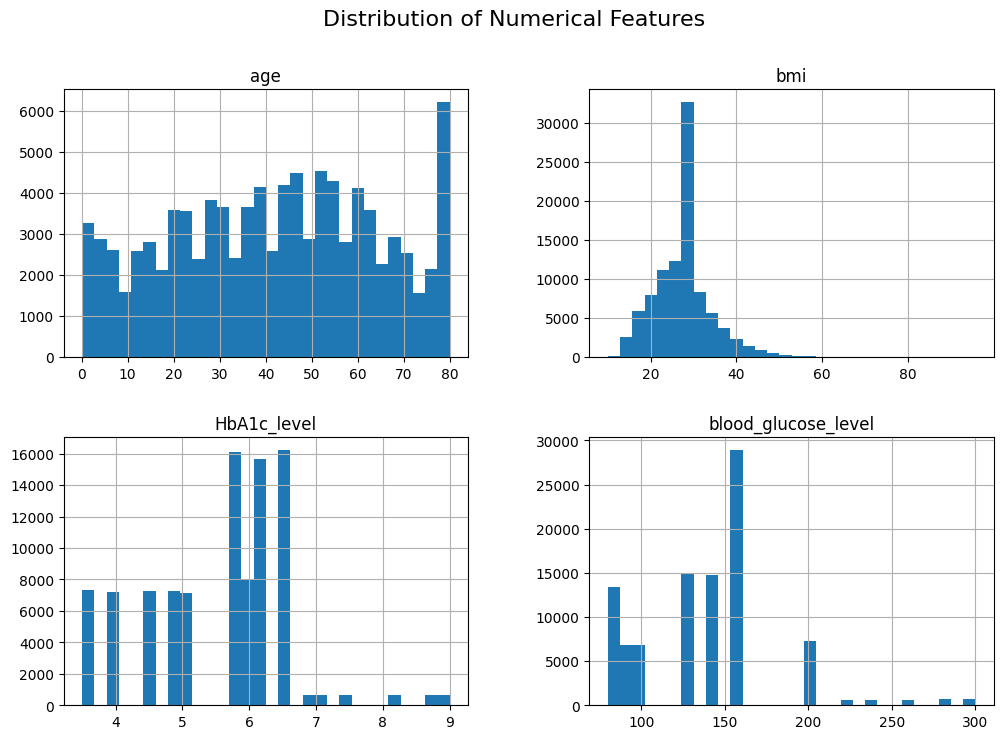

In [ ]:
numerical_cols = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]


df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


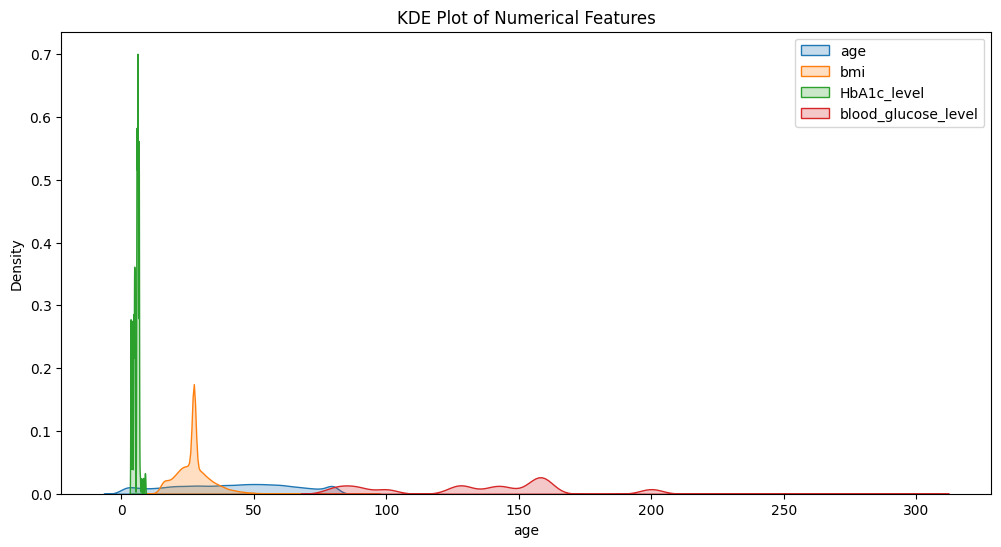

In [ ]:
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    sns.kdeplot(df[col], label=col, fill=True)
plt.legend()
plt.title("KDE Plot of Numerical Features")
plt.show()


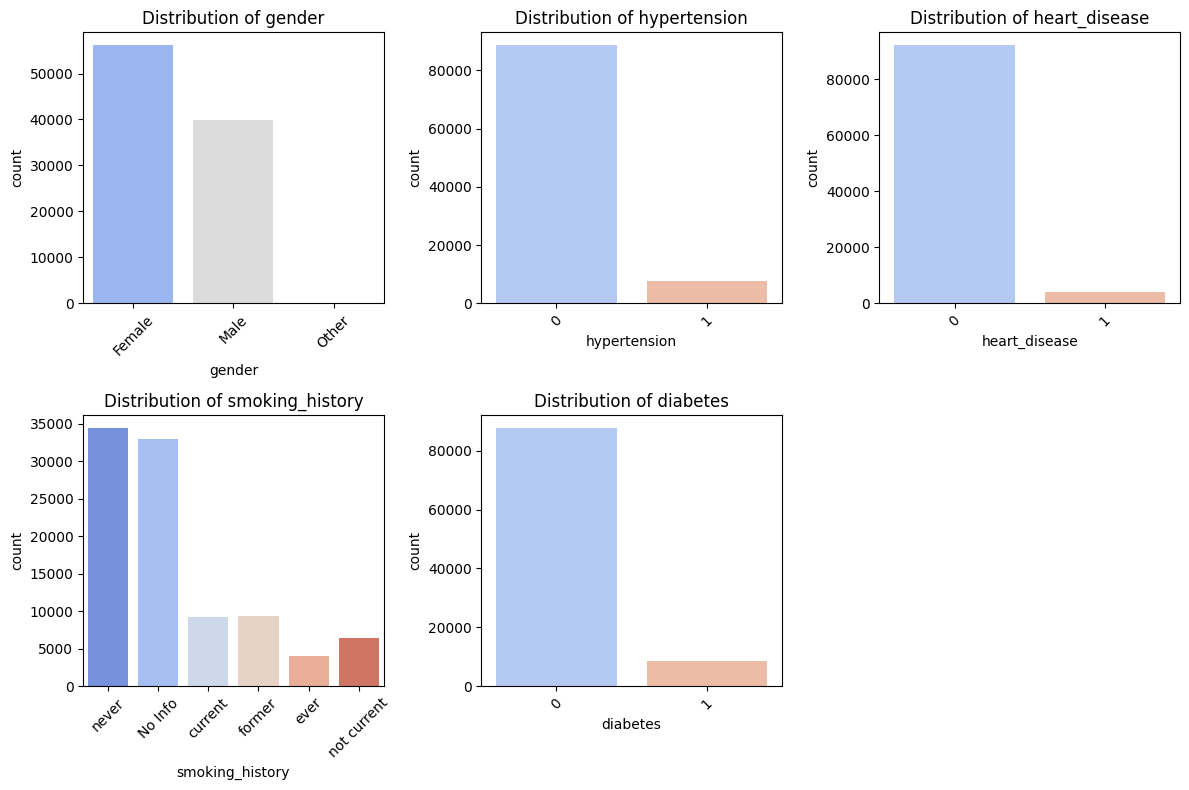

In [ ]:
categorical_cols = ["gender", "hypertension", "heart_disease", "smoking_history", "diabetes"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


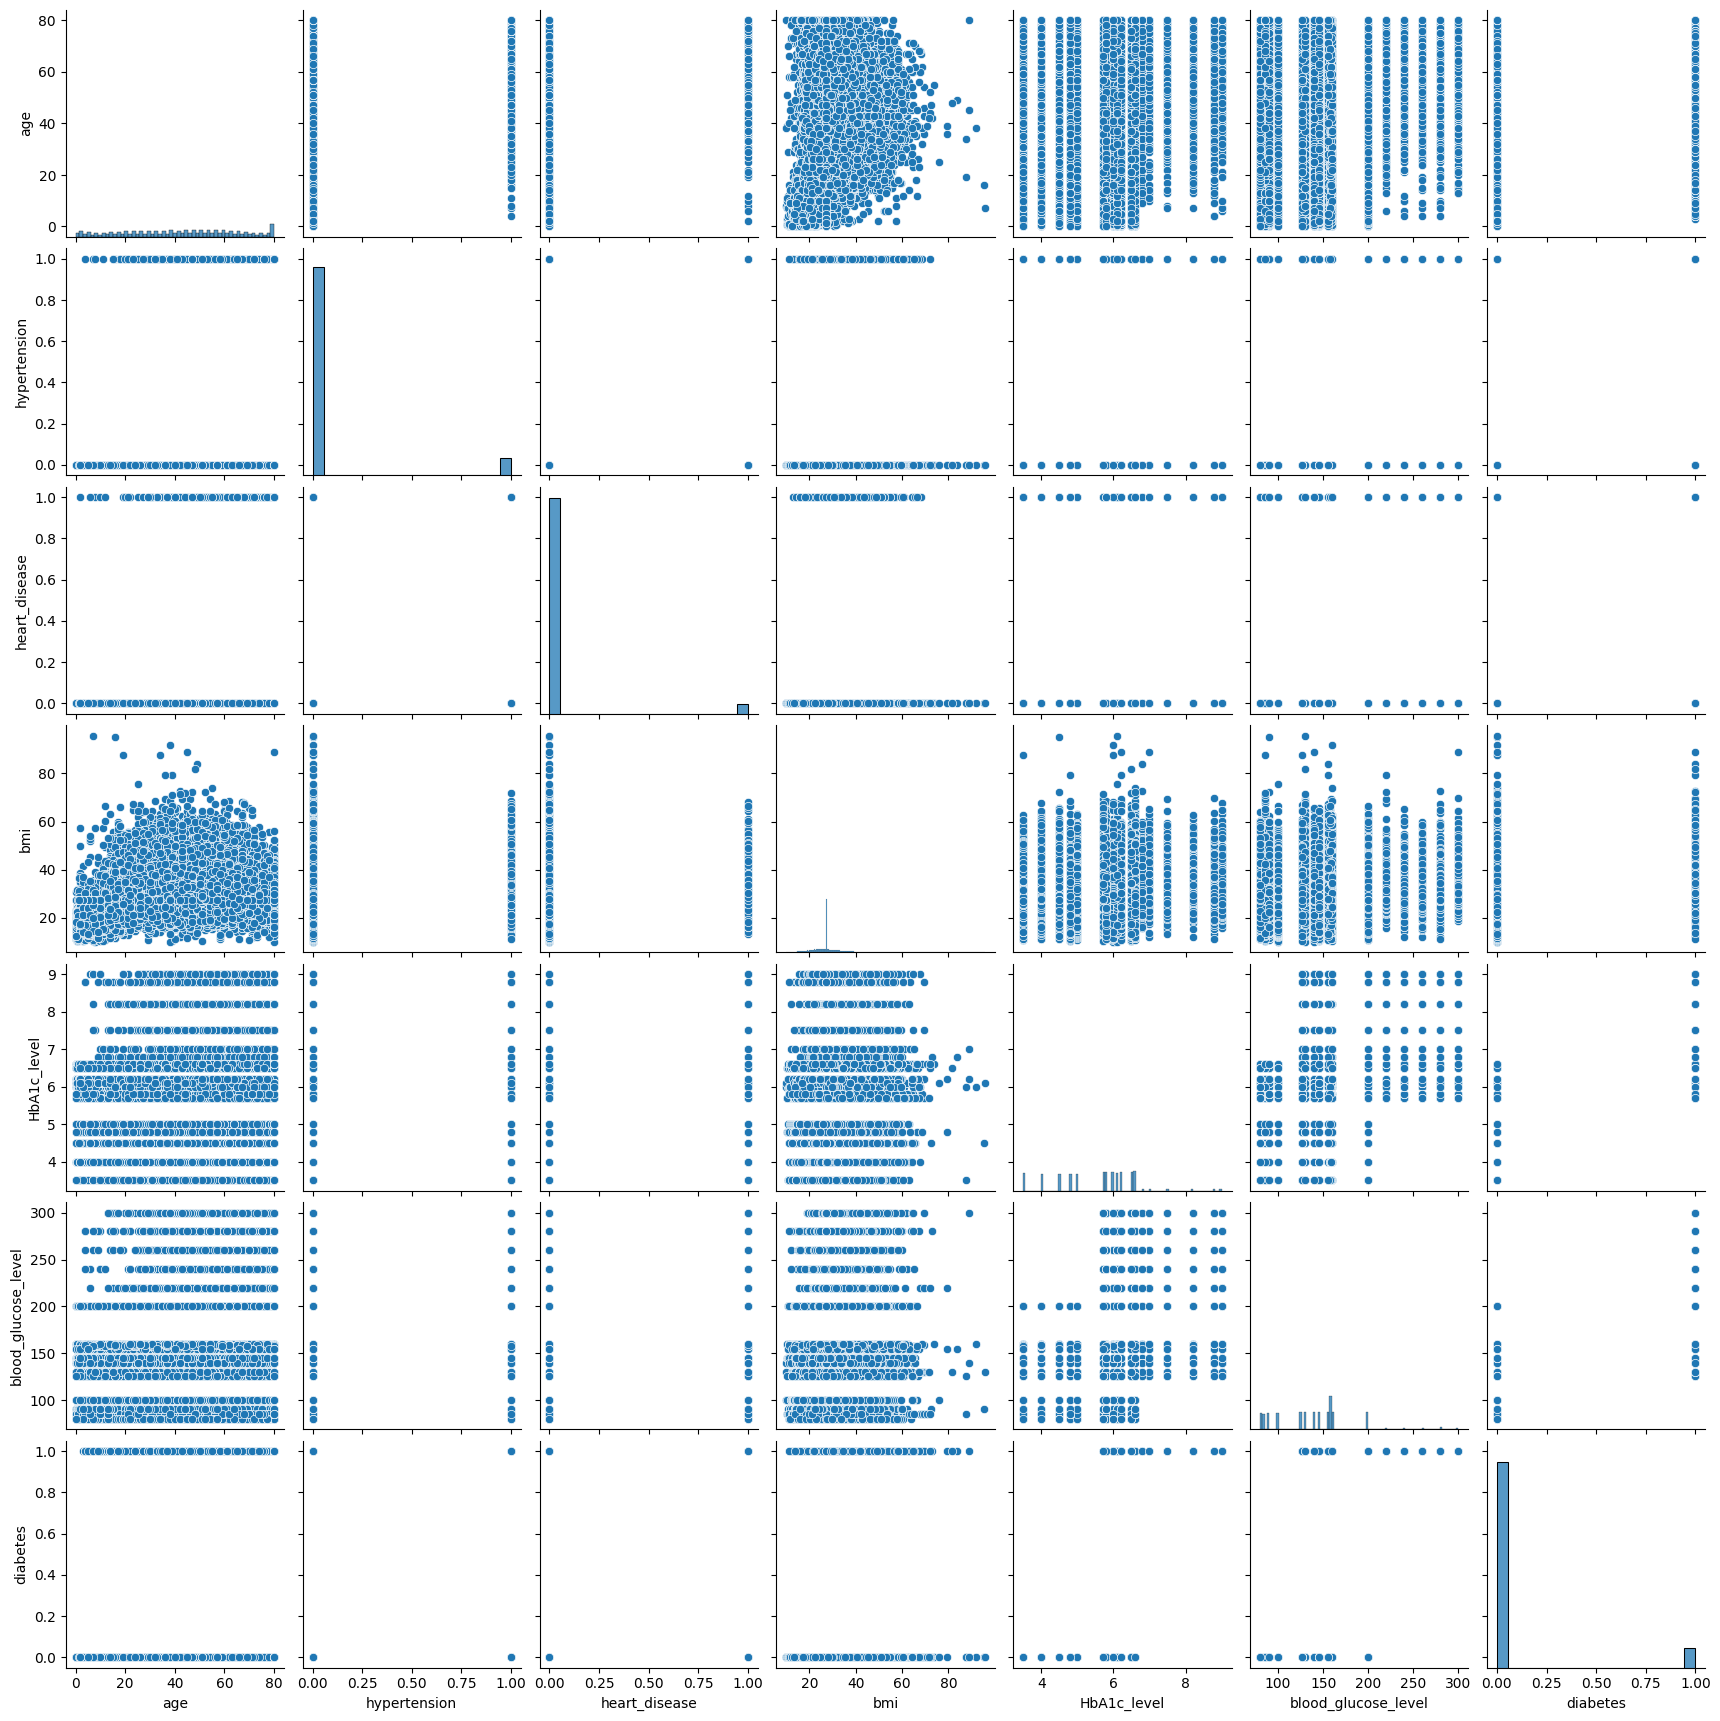

In [ ]:
sns.pairplot(df)

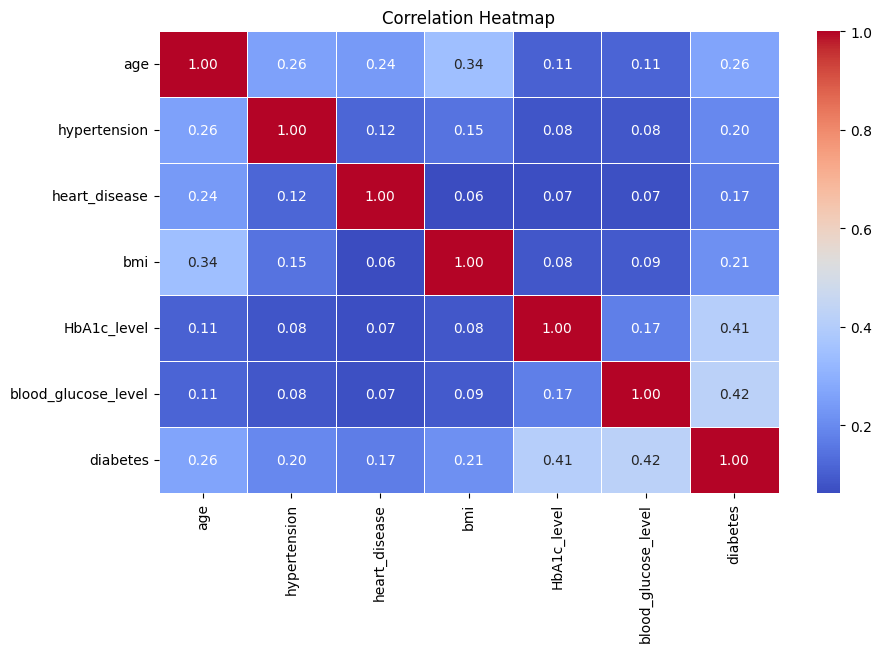

In [ ]:

numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Nothing is really highly correleated

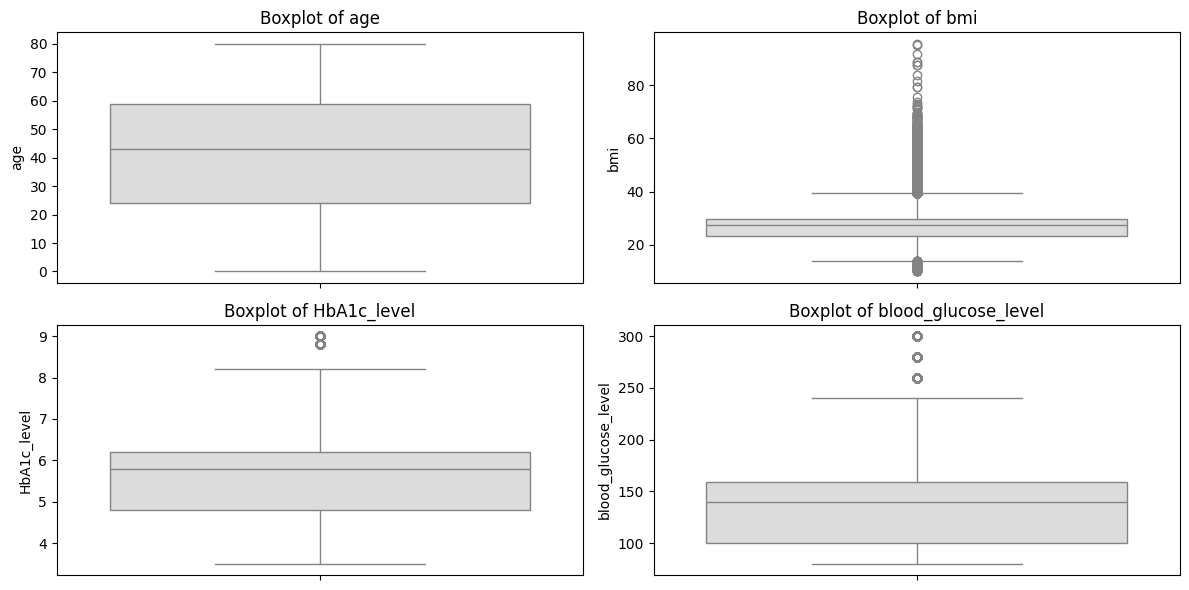

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Observations:

Age ---
The distribution looks fairly spread out.
No significant outliers.

BMI ---
Several outliers above the upper whisker.
Could indicate overweight or obesity cases.

HbA1c Level ---
A few outliers above 8.
High HbA1c values may indicate diabetes.

Blood Glucose Level ---
Some extreme outliers above 250.
Could represent diabetic patients

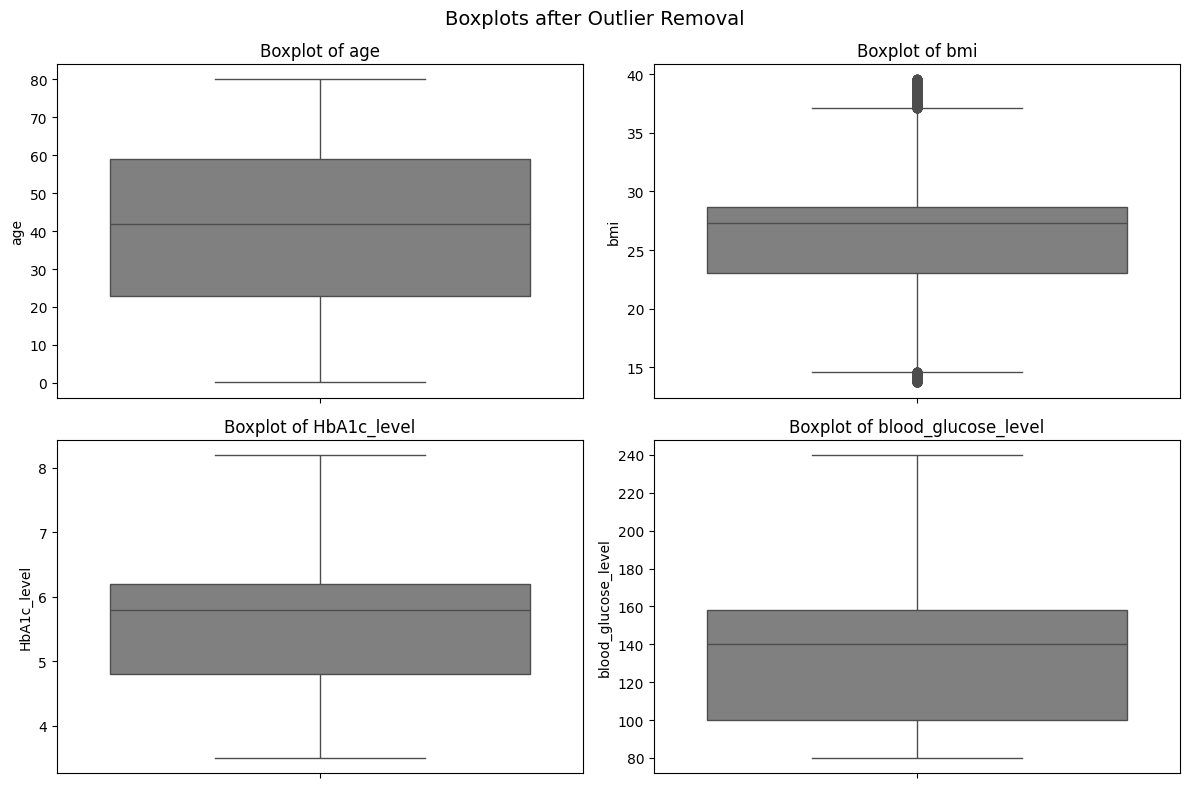

In [ ]:

num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Remove outliers
df_clean = remove_outliers(df, num_cols)

# Plot cleaned boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Boxplots after Outlier Removal", fontsize=14)

for i, col in enumerate(num_cols):
    ax = axes[i // 2, i % 2]
    sns.boxplot(y=df_clean[col], ax=ax, color='gray')
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# Feature Engineering & Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = RobustScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())

   gender       age  hypertension  heart_disease smoking_history       bmi  \
0  Female  1.057143             0              1           never -0.329721   
1  Female  0.314286             0              0         No Info  0.000000   
2    Male -0.428571             0              0           never  0.000000   
3  Female -0.200000             0              0         current -0.599071   
4    Male  0.942857             1              1         current -1.111455   

   HbA1c_level  blood_glucose_level  diabetes  
0     0.571429             0.000000         0  
1     0.571429            -1.016949         0  
2    -0.071429             0.305085         0  
3    -0.571429             0.254237         0  
4    -0.714286             0.254237         0  


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoke',drop_first=True)




KeyError: "None of [Index(['smoking_history'], dtype='object')] are in the [columns]"

In [ ]:
df.shape

(96146, 13)

In [ ]:
df[[ 'smoke_current', 'smoke_ever', 'smoke_former', 'smoke_never', 'smoke_not current']] = \
    df[[ 'smoke_current', 'smoke_ever', 'smoke_former', 'smoke_never', 'smoke_not current']].astype(int)


In [ ]:
print(df.head())

   gender       age  hypertension  heart_disease       bmi  HbA1c_level  \
0       0  1.057143             0              1 -0.329721     0.571429   
1       0  0.314286             0              0  0.000000     0.571429   
2       1 -0.428571             0              0  0.000000    -0.071429   
3       0 -0.200000             0              0 -0.599071    -0.571429   
4       1  0.942857             1              1 -1.111455    -0.714286   

   blood_glucose_level  diabetes  smoke_current  smoke_ever  smoke_former  \
0             0.000000         0              0           0             0   
1            -1.016949         0              0           0             0   
2             0.305085         0              0           0             0   
3             0.254237         0              1           0             0   
4             0.254237         0              1           0             0   

   smoke_never  smoke_not current  
0            1                  0  
1            0

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoke_current', 'smoke_ever',
       'smoke_former', 'smoke_never', 'smoke_not current'],
      dtype='object')

# Model Training and Scoring

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
import pandas as pd

X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote_enn = SMOTEENN(random_state=42)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

print("After resampling:", pd.Series(y_train).value_counts())



Before resampling: diabetes
1    66316
0    62473
Name: count, dtype: int64
After resampling: diabetes
1    66316
0    62473
Name: count, dtype: int64


In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoke_current,smoke_ever,smoke_former,smoke_never,smoke_not current
0,1,0.057143,0,0,-0.534056,-0.071429,-0.237288,0,0,0,0,0
1,0,0.600000,0,0,0.883901,-1.285714,-0.237288,0,0,1,0,0
2,0,0.057143,0,0,0.000000,0.571429,-0.237288,0,0,0,0,0
3,1,0.028571,1,0,0.238390,-0.714286,-1.016949,0,0,0,0,0
4,0,-0.457143,0,0,-0.130031,0.500000,1.016949,0,0,0,0,1


In [ ]:
y_train.head()

,diabetes
79000,0
32011,0
95559,0
32057,0
97797,0


In [ ]:
y_train.unique()

array([0, 1])

In [ ]:
y_train.value_counts()

,count
diabetes,
1,66316
0,62473


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

log_reg_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'scale_pos_weight': [1, 5, 10]}

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='recall')
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='recall')
xgb_cv = GridSearchCV(xgb_clf, xgb_params, cv=5, scoring='recall')

log_reg_cv.fit(X_train, y_train)
rf_cv.fit(X_train, y_train)
xgb_cv.fit(X_train, y_train)

best_log_reg = log_reg_cv.best_estimator_
best_rf = rf_cv.best_estimator_
best_xgb = xgb_cv.best_estimator_

print("Best Logistic Regression Params:", log_reg_cv.best_params_)
print("Best Random Forest Params:", rf_cv.best_params_)
print("Best XGBoost Params:", xgb_cv.best_params_)



KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

# Make predictions
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Print classification reports
print("🔹 Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("🔹 Random Forest:\n", classification_report(y_test, y_pred_rf))
print("🔹 XGBoost:\n", classification_report(y_test, y_pred_xgb))


In [ ]:
from sklearn.metrics import classification_report

y_pred = xgb_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17534
           1       0.92      0.72      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.95      0.86      0.90     19230
weighted avg       0.97      0.97      0.97     19230



hmm  we have low recall on diabetic cases meaning we are not finding many diabetic cases

In [ ]:
importances = xgb_grid.best_estimator_.feature_importances_
feature_names = X_train.columns
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Top 10 Important Features:")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.4f}")


Top 10 Important Features:
HbA1c_level: 0.4722
blood_glucose_level: 0.3166
age: 0.0764
hypertension: 0.0374
heart_disease: 0.0291
bmi: 0.0265
gender: 0.0086
smoke_never: 0.0083
smoke_not current: 0.0079
smoke_former: 0.0068
